In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa=pd.read_csv(r'C:\Users\user\Documents\naresh it 2\Desktop\naresh it\data files\visadataset_file.csv')
visa.head(3)


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied


**Bi variate analysis**
- Analysis the two variable
- two categorical columns'
- two numerical columns
- one categoricl and one numerical

**categorical vs categorical**

In [3]:
visa.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [4]:
cat=visa.select_dtypes(include='object').columns
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [5]:
num=visa.select_dtypes(exclude='object').columns
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**continent case status**

In [6]:
visa['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [7]:
visa['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

**how many asia people are visa certified**

**how many asia people got visa denied**

In [8]:
con1=(visa['continent']=='Asia')
con2=visa['case_status']=='Certified'
con=con1&con2
len(visa[con])
print('the no.of employees visa certified of aisa are:',len(visa[con]))

the no.of employees visa certified of aisa are: 11012


In [9]:
con1=(visa['continent']=='Asia')

con2=visa['case_status']=='Denied'
con=con1&con2
len(visa[con])
print('the no.of employees visa denied of aisa are:',len(visa[con]))

the no.of employees visa denied of aisa are: 5849


In [10]:
cont=visa['continent'].unique()
certi_list=[]
denied_list=[]
for i in cont:
    con1=visa['continent']==i
    con2=visa['case_status']=='Certified'
    con3=visa['case_status']=='Denied'
    certi_con=con1&con2
    d_con=con1&con3
    certi_list.append(len(visa[certi_con]))
    denied_list.append(len(visa[d_con]))
pd.DataFrame(zip(certi_list,denied_list),columns=['Certified','Denied'],index=cont)

,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**cross tab**
 - it take two arguments
 - first argument index
 - second aregument columns

In [11]:
con1=visa['continent']
con2=visa['case_status']
result=pd.crosstab(con1,con2)
result
result2=result.T
result

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


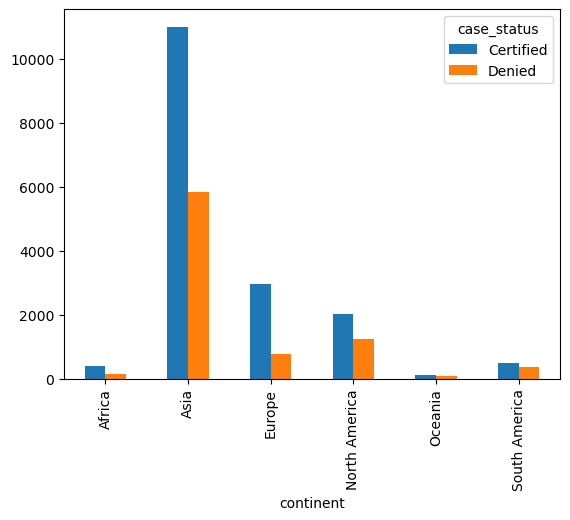

In [12]:
result.plot(kind='bar')
plt.show()


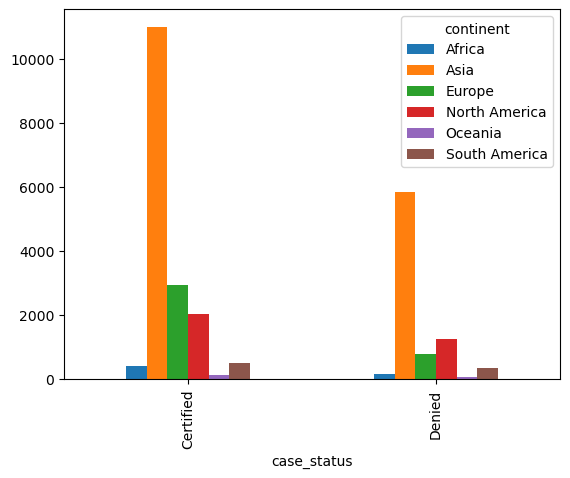

In [13]:
result2.plot(kind='bar')
plt.show()

In [14]:
con1=visa['continent']
con2=visa['education_of_employee']
con3=visa['case_status']

col=[con1,con2]
result3=pd.crosstab(col,con3)
result3

case_status                          Certified  Denied
continent     education_of_employee                   
Africa        Bachelor's                    81      62
              Doctorate                     43      11
              High School                   23      43
              Master's                     250      38
Asia          Bachelor's                  4407    2761
              Doctorate                    780     143
              High School                  676    1614
              Master's                    5149    1331
Europe        Bachelor's                  1040     259
              Doctorate                    788      58
              High School                  162     328
              Master's                     967     130
North America Bachelor's                   641     584
              Doctorate                    207      51
              High School                  210     191
              Master's                     979     429
Oceania       Bachelor's                    38      28
              Doctorate                     19       3
              High School                   19      17
              Master's                      46      22
South America Bachelor's                   160     173
              Doctorate                     75      14
              High School                   74      63
              Master's                     184     109

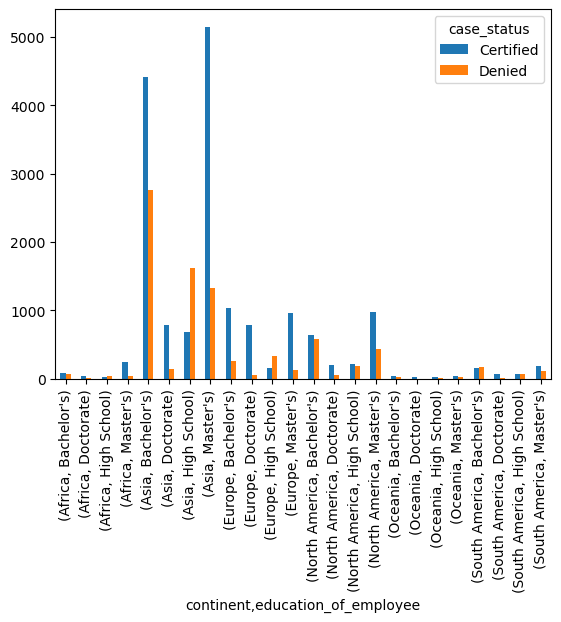

In [15]:
result3.plot(kind='bar')
plt.show()


**Numerical - Numerical**

- in order to plot numerical vs numerical we need to use scatter plot
- scatter plots gives the relation between two numerical columns
- it is under matplotlib

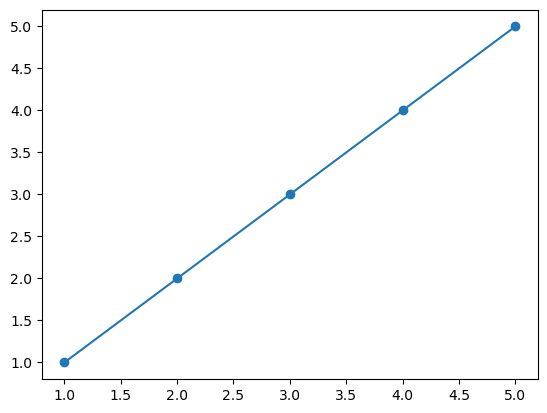

In [16]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
# it is y=x plot
plt.scatter(x,y)
plt.plot(x,y)# if you want to draw line on the dots
plt.show()

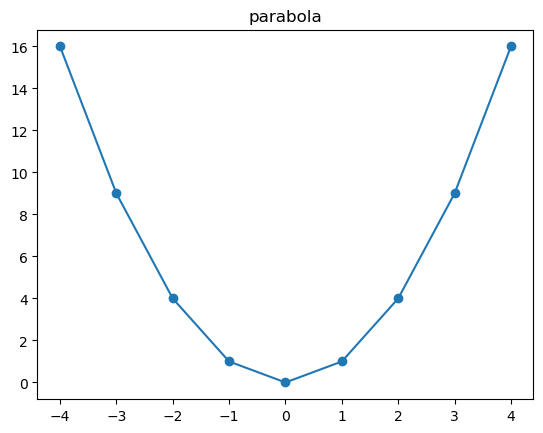

In [17]:
x=[i for i in range(-4,5)]
y=[i*i for i in x]
plt.scatter(x,y)
plt.plot(x,y)
plt.title('parabola')
plt.show()

In [18]:
num_cols=visa.select_dtypes(exclude='object').columns
num_cols

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**scatter plot - 1**

- no.of employess
- and yr_of _estad

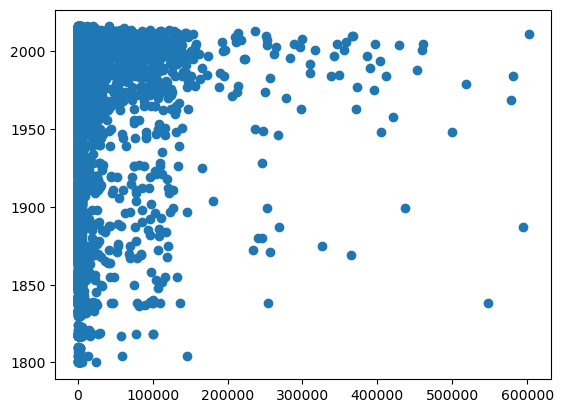

In [19]:
col1=visa['no_of_employees']
col2=visa['yr_of_estab']
plt.scatter(col1,col2)# no relation
plt.show()

**observation**: no relation
   - pearson correlation r==0

**scatter plot2**
- no of emplyoee and prevailing wage

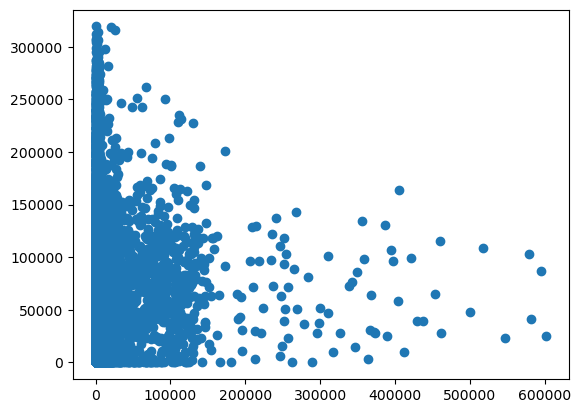

In [20]:
col3=visa['prevailing_wage']
plt.scatter(col1,col3)
plt.show()

**scatter plot 3**
 - yr_of estab and prevailing wage

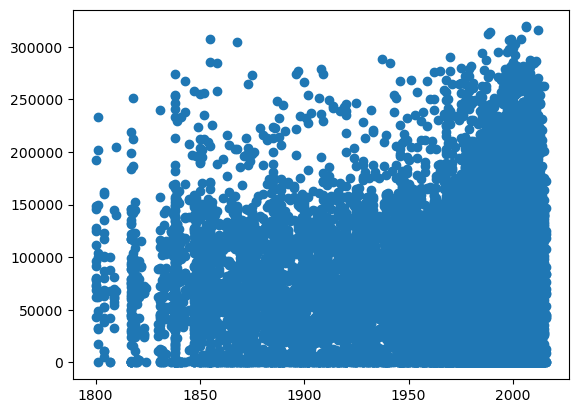

In [21]:
plt.scatter(col2,col3)
plt.show()

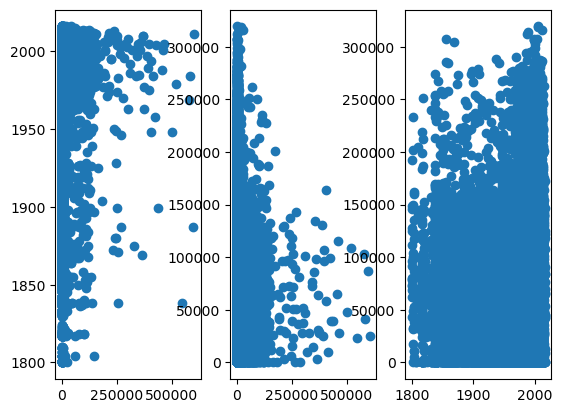

In [22]:

plt.subplot(1,3,1).scatter(col1,col2)
plt.subplot(1,3,2).scatter(col1,col3)
plt.subplot(1,3,3).scatter(col2,col3)
plt.show()

**pearson correlation formula**

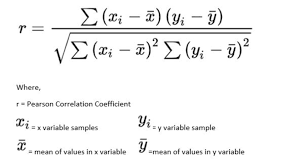

- pearson correlation cofficient will give the amount of relation between variables
-  denoted by r
-  r varies from -1 to 1
-  for positive  relation r varies from 0 to 1
-  for negative r varies from -1 to 0
-  for no relation r approximate 0
-  in python code we have **corr** function under pandas
     - this will gine covarience matrix
     - we already discuss covarience matrix is rows and columns type
     -  in data there are 3 values
     -  it will give 3*3 9 values
     -  all trace of the matrix represt varience
     -  upper triangle and lower triangle repesent covariance

In [23]:
visa.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


**observation**
- the correlation value between no_of_values and yr_of_estab is approx zero
  
      - which indicates no relation
- the correlation value between no_of_values and prevaling wages is approx zero
  
      - which indicates no relation
- the correlation value between pervailing _wage and yr_of_estab is approx zero
  
      - which indicates no relation

**what happen if correlation is high**
- for that we will read wine quality dataset
- will perform the corr

In [24]:
wine_df=pd.read_csv(r'winequality_red.csv')# location same
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [25]:
wine_data=wine_df.drop_duplicates()
# if you see row NAN
wine_data.iloc[1:,:]
# indexs are not in the order 
# you need to work on this how to make the order

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [26]:
len(wine_data.columns)

12

In [27]:
#correaltion 12
#12*12 144
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


$ to find the smallest one in above data or any data

**heat map**
- heat map  will provide the matrix representation of correlation value
- heat map represents in color format 
- different different value in different color
- beside matrix it will display color bar 
- color bar means like as scale of values with color 
- it is unders seaborn package

In [28]:
import seaborn as sns
sns.__version__

'0.13.2'

In [29]:
pip install seaborn --upgrade

<Axes: >

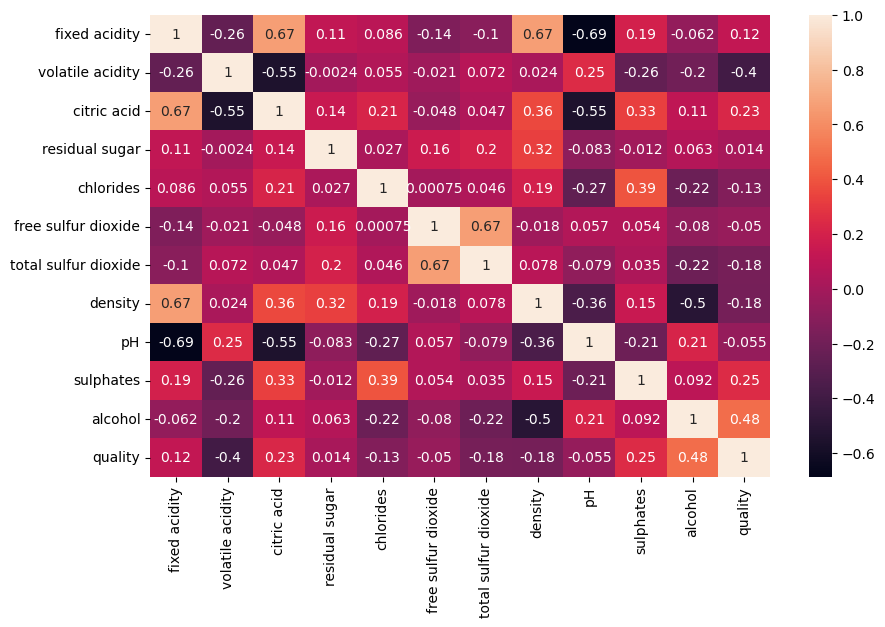

In [34]:

wine_corr=wine_data.corr()
plt.figure(figsize=(10,6))
h_map=sns.heatmap(wine_corr,annot=True)# annot for value to be [rinted
h_map

<Axes: >

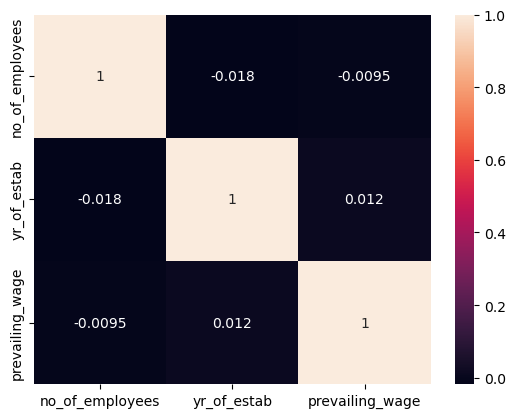

In [33]:
visa_corr=visa.corr(numeric_only=True)

sns.heatmap(visa_corr,annot=True)

In [ ]:
#Draw the scatter plot for wine data columns
# which is having highest positive correlaton
# which is having highest negative correlation

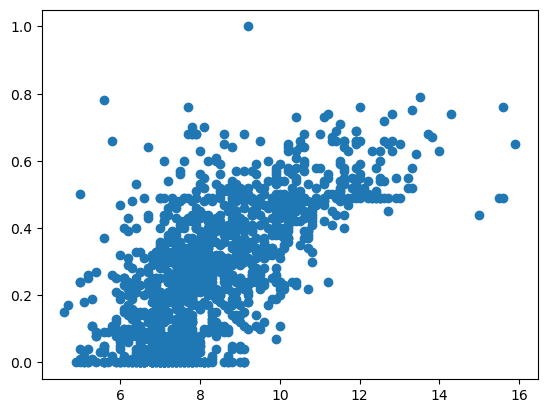

In [44]:
col1=wine_data['fixed acidity']
col2=wine_data['citric acid']
plt.scatter(col1,col2)